In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow.keras.utils as ku
from wordcloud import WordCloud
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Embedding,LSTM,Dense,Dropout,Bidirectional
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import regularizers

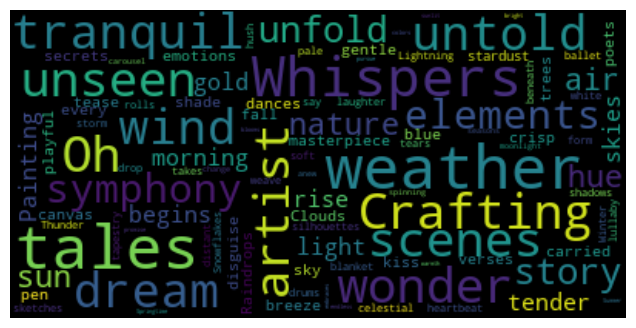

In [13]:
data=open("poem.txt",encoding="utf8").read()

wordcloud=WordCloud(max_font_size=40,
                   max_words=100,
                   background_color="black").generate(data)

plt.figure(figsize=(8,4))
plt.imshow(wordcloud,interpolation="bilinear")
plt.axis("off")
plt.savefig("WordCloud.png")
plt.show()

In [14]:
corpus=data.lower().split("\n")
print(corpus[:10])

["in the morning's tender light, the sun begins to rise,", 'painting skies with hues of gold, a masterpiece in disguise.', 'the air, a crisp and gentle kiss, whispers secrets to the trees,', 'as nature dances in the breeze, carried on the playful tease.', '', 'oh, the weather, an artist unseen,', 'crafting scenes of wonder, a tranquil dream.', 'whispers in the wind, tales untold,', 'a symphony of elements, a story to unfold.', '']


In [15]:
token=Tokenizer()
token.fit_on_texts(corpus)

total_word=len(token.word_index)
print("Word: ",total_word)

Word:  141


In [16]:
input_seq=[]
for line in corpus:
    token_list=token.texts_to_sequences([line])[0]
    
    for i in range(1,len(token_list)):
        n_gram_sequence = token_list[:i+1]
        input_seq.append(n_gram_sequence)
max_seq_len=max([len(x) for x in input_seq])
input_seq=np.array(pad_sequences(input_seq,maxlen=max_seq_len,padding="pre"))
predictors,label=input_seq[:,:-1],input_seq[:,-1]
label=ku.to_categorical(label,num_classes=total_word+1)

In [23]:
model=Sequential()
model.add(Embedding(total_word+1,100,input_length=max_seq_len-1))
model.add(Bidirectional(LSTM(140,return_sequences=True)))
model.add(Dropout(0.2))
model.add(LSTM(100))
model.add(Dense(total_word+1/2, activation="relu", kernel_regularizer=regularizers.l2(0.01)))
model.add(Dense(total_word+1,activation="softmax"))

model.compile(loss="categorical_crossentropy",optimizer="adam", metrics=["accuracy"])
          
model.summary()


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 11, 100)           14200     
                                                                 
 bidirectional_1 (Bidirecti  (None, 11, 280)           269920    
 onal)                                                           
                                                                 
 dropout_1 (Dropout)         (None, 11, 280)           0         
                                                                 
 lstm_3 (LSTM)               (None, 100)               152400    
                                                                 
 dense_2 (Dense)             (None, 141)               14241     
                                                                 
 dense_3 (Dense)             (None, 142)               20164     
                                                     

In [24]:
history=model.fit(predictors,label,epochs=100,verbose=1)

Epoch 1/100


8/8 [==============================] - 11s 43ms/step - loss: 6.0483 - accuracy: 0.0482
Epoch 2/100
8/8 [==============================] - 0s 39ms/step - loss: 5.8365 - accuracy: 0.0877
Epoch 3/100
8/8 [==============================] - 0s 40ms/step - loss: 5.5074 - accuracy: 0.0658
Epoch 4/100
8/8 [==============================] - 0s 39ms/step - loss: 5.2770 - accuracy: 0.0570
Epoch 5/100
8/8 [==============================] - 0s 39ms/step - loss: 5.1292 - accuracy: 0.0746
Epoch 6/100
8/8 [==============================] - 0s 38ms/step - loss: 4.9847 - accuracy: 0.0746
Epoch 7/100
8/8 [==============================] - 0s 39ms/step - loss: 4.8758 - accuracy: 0.0789
Epoch 8/100
8/8 [==============================] - 0s 38ms/step - loss: 4.7679 - accuracy: 0.0746
Epoch 9/100
8/8 [==============================] - 0s 38ms/step - loss: 4.6493 - accuracy: 0.0877
Epoch 10/100
8/8 [==============================] - 0s 40ms/step - loss: 4.5305 - accuracy: 0.0921
Epoch 11/100
8/8

In [29]:
seed_text="Scifor Technologies"
next_word=28
output_text=" "

for i in range(next_word):
    token_list=token.texts_to_sequences([seed_text])[0]
    token_list = pad_sequences([token_list],maxlen=max_seq_len-1,padding='pre')

    predicted=np.argmax(model.predict(token_list,verbose=0),axis=-1)
    
    output_word=" "
    
    for word,index in token.word_index.items():
        if index==predicted:
            output_word=word
            break
    seed_text+=" "+output_word
print(seed_text)

Scifor Technologies the seasons artist unseen unseen shade and white secrets the free trees trees trees trees trees trees trees trees trees trees trees trees trees trees trees trees trees
